## Question 1 : Independence

Show that the following equations are equivalent

(1) P(B|A) = P(B)

(2) P(A,B) = P(A)*P(B)                      

## Answer 1 :

Since the events A and B are independent, $P(A ∩ B) = P(A) *P(B) = P(B ∩ A)$.

(1) $P(B|A) = P(B)$
By Bayes' rule, $P(B|A) = P(B ∩ A) / P(A)$.

By the assumption of independence and Bayes' rule,

$$P(B|A) = P(A) * P(B) / P(A) = P(B)$$

(2) $P(A,B) = P(A)*P(B)$

Since events A and B are independent $P(A,B) = P(A ∩ B) = P(A)*P(B)$

## Question 2: 

Suppose we have a 3-sided die, but we don't know the probability (categorical distribution) of each side. Assume the uniform distribution as a prior.

After 100 tosses, we count the number of times each side has showed up.

| Side 1 | Side 2 | Side 3 |
| --- | --- | --- |
| 30 | 10 | 60|

(1) What is the maximum likelihood estimate for the probability of Side 3? (Frequentist)

(2) Calculate analytically the expected value (mean) for the probability of Side 3 using the posterior distribution? 
Hint: use the conjugate prior of the categorical distribution

(3) Use PyMC3 to draw 1000 samples from the posterior, e.g., 
pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True).

(4) Inspect the samples with plots, e.g., pm.traceplot() and 
az.plot_posterior(). Compare with the anlaytical result.


In [55]:
 ## Your code here
# Question 1
max_likelihood_prob_side_3 = 60/100
print('The frequentist estimate for probability of side 3 based on given samples and assumption of uniform distribution is: ',max_likelihood_prob_side_3)


The frequentist estimate for probability of side 3 based on given samples and assumption of uniform distribution is:  0.6


In [56]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# Question 2
import numpy as np
# the likelihood is categorial random variable
#the conjugate prior of a categorical random variable is the dirichlet distribution
 # alphs = (1,1,1) since we assume uniform distribution over possible values of probabilities
 #hence, posterior would be a dirichlet ditribution Dir((c1+alpha1,c2+alpha2,c3+alpha3),num_samples), here ci's are counts of occurences for respective sides of a dice
posterior = np.random.dirichlet((1+30,1+10,1+60),100)
posterior_side_3 = []
for i in range(100):
  posterior_side_3.append(posterior[i][2])
print('Expected value of probability of side 3 is: ',np.mean(posterior_side_3))

Expected value of probability of side 3 is:  0.5957114827034734


In [58]:
# Question 3
import pymc3 as pm
with pm.Model() as posterior: 
   post = pm.Dirichlet("posterior",a=[1+30,1+10,1+60])
   trace = pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


In [59]:
samples = trace["posterior"]
samples

array([[0.28500205, 0.09612415, 0.6188738 ],
       [0.28500205, 0.09612415, 0.6188738 ],
       [0.25678155, 0.0840824 , 0.65913605],
       ...,
       [0.24605384, 0.14801987, 0.60592629],
       [0.29412164, 0.13632104, 0.56955732],
       [0.30312149, 0.07278464, 0.62409387]])

<ipython-input-60-795f9522c689>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff77de991c0>,
      dtype=object)

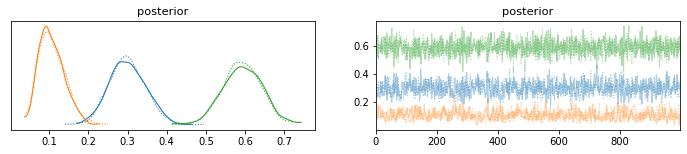

In [60]:
# Question 4 -- 1
pm.traceplot(trace)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff77dbaac70>,
      dtype=object)

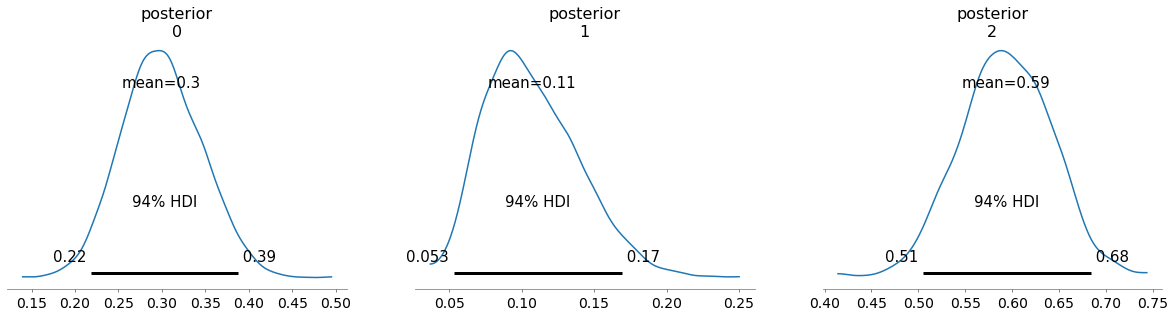

In [61]:
# Question 4 -- 2
import arviz as az
az.plot_posterior(trace)

The mean computed by Bayesian inference is approximately equal to that of frequentist and analytical results.

## Question 3

(1) Draw 10000 samples from a (standard) multivariate normal distrubtion in 10 dimensions. Assume the mean to be a vector of zeros and the covariance matrix has diagonal values equal to 1 and the off-diagonal entires equal to zero.

Plot a histogram of the distances of the samples from the zero.
What is the average distance from zero?

(2) Same as (1) but in 100 dimensios.

(3) Compare the results of (1) and (2)

Avergae distance from zero is:  315.16413937727094


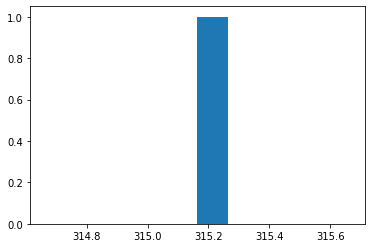

In [62]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt
mean = [0]*10
cov = np.identity(10)
samples = np.random.multivariate_normal(mean,cov,size = 10000)
dist1 = np.linalg.norm(samples)
print('Avergae distance from zero is: ', dist1)
plt.hist(dist1);

Average distance from zero is:  1000.5543457594002


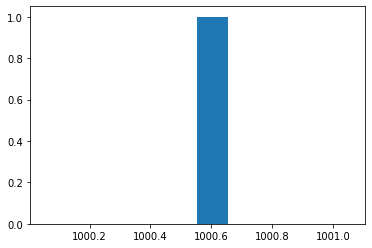

In [63]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt
mean = [0]*100
cov = np.identity(100)
samples = np.random.multivariate_normal(mean,cov,size = 10000)
dist2 = np.linalg.norm(samples)
print('Average distance from zero is: ',np.mean(dist2))
plt.hist(dist2);

Question 3



In [64]:
change_in_mean_dist = np.mean(dist2)/np.mean(dist1)
print('The average distance from zero increases as the number of dimensions increase by a factor of ',change_in_mean_dist)

The average distance from zero increases as the number of dimensions increase by a factor of  3.1747087334757804
